In [1]:
pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB 41.0 kB/s eta 0:03:45
     ---------------------------------------- 0.0/9.2 MB 41.0 kB/s eta 0:03:45
     ---------------------------------------- 0.0/9.2 MB 41.0


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ---- -------------------------------- 30.7/250.0 kB 640.0 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/250.0 kB 640.0 kB/s eta 0:00:01
     --------- --------------------------- 61.4/250.0 kB 409.6 kB/s eta 0:00:01
     ------------- ----------------------- 92.2/250.0 kB 521.8 kB/s eta 0:00:01
     -------------------- --------------- 143.4/250.0 kB 607.9 kB/s eta 0:00:01
     ---------------------------- ------- 194.6/250.0 kB 692.9 kB/s eta 0:00:01
     ------------------------------------ 250.0/250.0 kB 766.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# COAL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_excel('coal p.xlsx')

In [3]:
data['total_capacity'] = data['Capacity in MW']

In [4]:
data

,Name,Location,District,State,Region,Unit capacities,Capacity in MW,Sector,Year,Latitude,longitude,total_capacity
0,Titagarh Thermal Power Station,Titagarh,North 24 Paraganas,West Bengal,Eastern,4 x 60,240,Private,1899,23.797752,87.986416,240
1,New Cossipore Generating Station,Cossipore,Kolkata,West Bengal,Eastern,"2 x 30$, 2 x 50$, 1 x 100",100,Private,1949,23.797752,87.986416,100
2,Trombay Thermal Power Station,Trombay,Mumbai,Maharashtra,Western,"1 x 150$, 2 x 500$, 1 x 250",750,Private,1956,19.450686,76.110676,750
3,Neyveli Thermal Power Station II,Neyveli,Cuddalore,Tamil Nadu,Southern,"7 x 210, 2 x 250",1970,Central,1962,11.013652,78.408491,1970
4,Neyveli Thermal Power Station I,Neyveli,Cuddalore,Tamil Nadu,Southern,"6 x 50$, 3 x 100$, 2 x 210",420,Central,1962,11.013652,78.408491,420
...,...,...,...,...,...,...,...,...,...,...,...,...
122,Hinduja Thermal Power Station,Devada,Visakhapatnam,Andhra Pradesh,Southern,1 x 525,525,Private,2015,14.707038,79.957906,525
123,Bhartiya Rail Bijlee Company Limited (BRBCL),Nabinagar,Aurangabad,Bihar,Eastern,4x 250,1000,Central,2016,25.200840,85.523890,1000
124,Singareni Thermal Power Plant,Pegadapalli,Mancherial,Telangana,Southern,2 x 600,1200,PSU,2016,17.802516,79.010760,1200
125,Yermarus Thermal Power Station,Yermarus,Raichur,Karnataka,Southern,2 x 800,1600,State,2017,14.707038,76.170276,1600


In [5]:
data.tail()

,Name,Location,District,State,Region,Unit capacities,Capacity in MW,Sector,Year,Latitude,longitude,total_capacity
122,Hinduja Thermal Power Station,Devada,Visakhapatnam,Andhra Pradesh,Southern,1 x 525,525,Private,2015,14.707038,79.957906,525
123,Bhartiya Rail Bijlee Company Limited (BRBCL),Nabinagar,Aurangabad,Bihar,Eastern,4x 250,1000,Central,2016,25.200840,85.523890,1000
124,Singareni Thermal Power Plant,Pegadapalli,Mancherial,Telangana,Southern,2 x 600,1200,PSU,2016,17.802516,79.010760,1200
125,Yermarus Thermal Power Station,Yermarus,Raichur,Karnataka,Southern,2 x 800,1600,State,2017,14.707038,76.170276,1600
126,Nabinagar Super Thermal Power Project,Nabinagar,Aurangabad,Bihar,Eastern,3 x 660,1980,Central,2019,25.200840,85.523890,1980


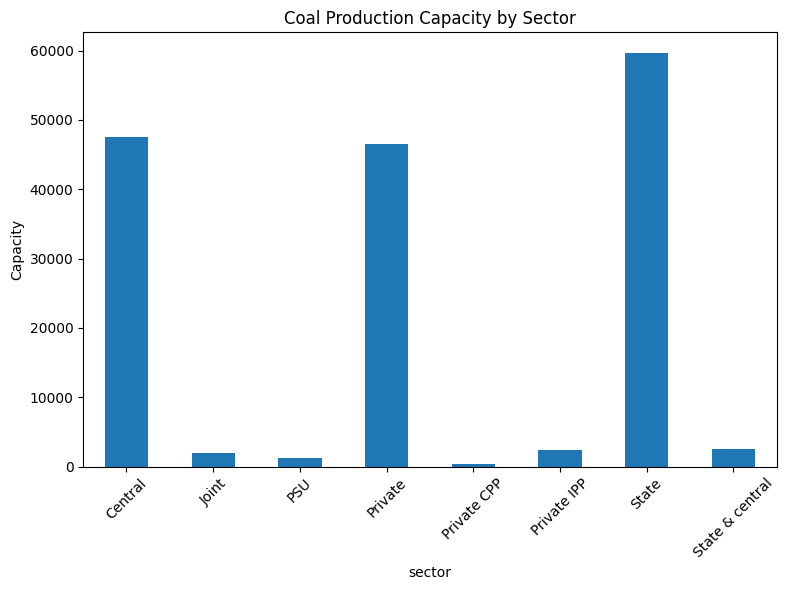

In [6]:
state_capacity = data.groupby('Sector')['total_capacity'].sum()
plt.figure(figsize=(8, 6))
state_capacity.plot(kind='bar')
plt.title('Coal Production Capacity by Sector')
plt.xlabel('sector')
plt.ylabel('Capacity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

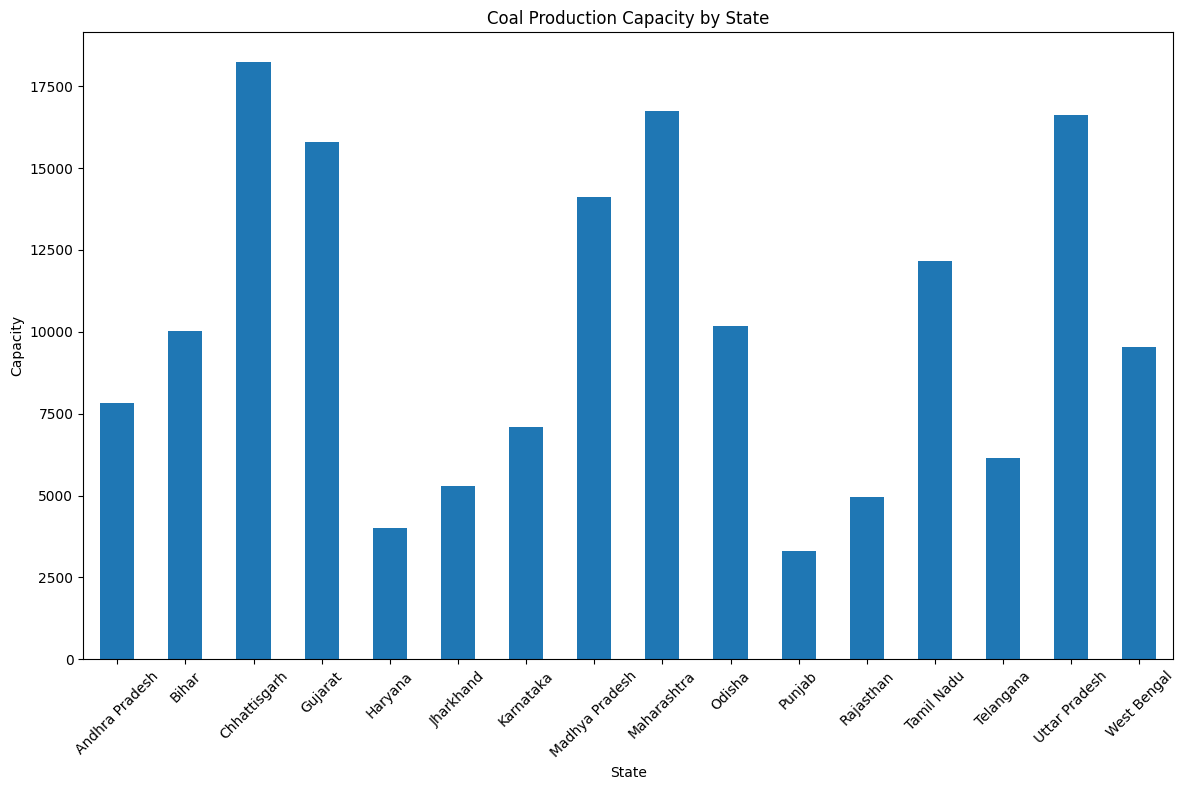

In [7]:
state_capacity = data.groupby('State')['total_capacity'].sum()
plt.figure(figsize=(12, 8))
state_capacity.plot(kind='bar')
plt.title('Coal Production Capacity by State')
plt.xlabel('State')
plt.ylabel('Capacity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

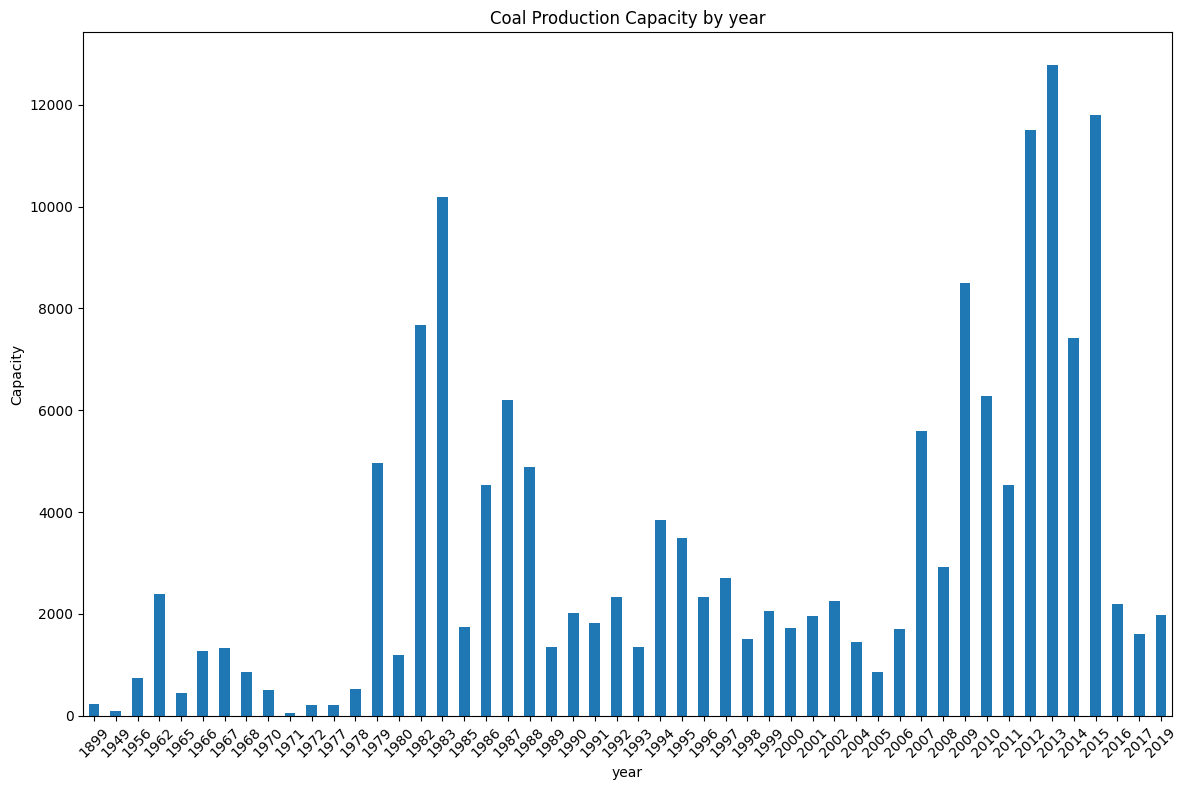

In [8]:
state_capacity = data.groupby('Year')['total_capacity'].sum()
plt.figure(figsize=(12, 8))
state_capacity.plot(kind='bar')
plt.title('Coal Production Capacity by year')
plt.xlabel('year')
plt.ylabel('Capacity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported inde

Root Mean Squared Error: 1105.07


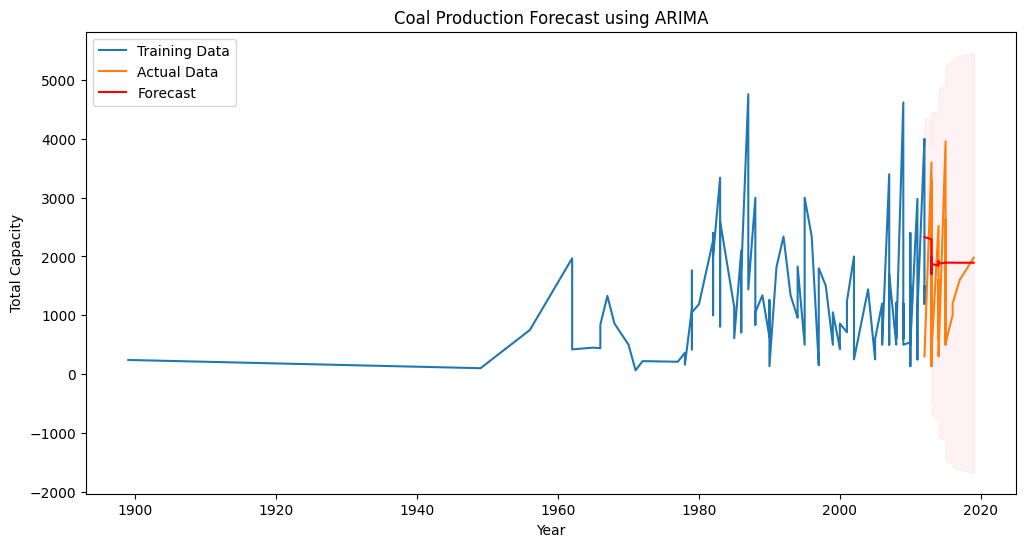

C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


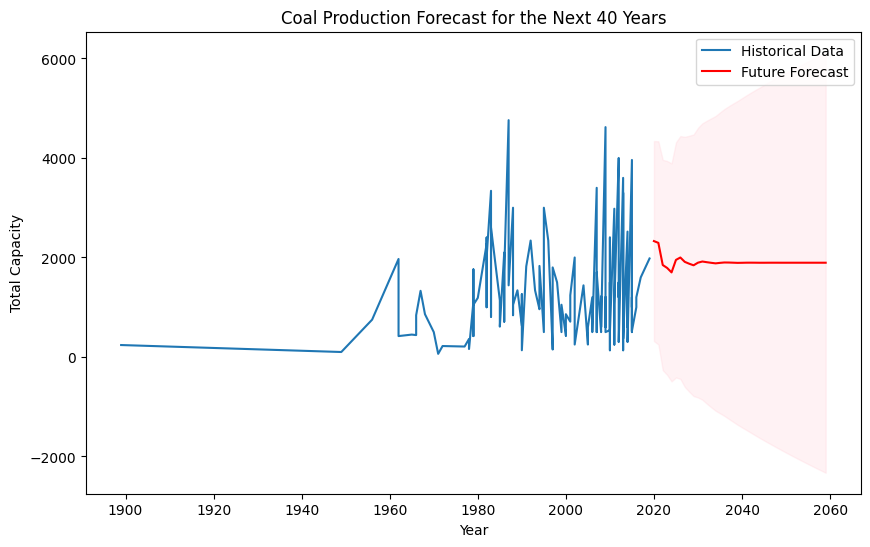

In [9]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Split data into training and testing sets
train_size = int(0.8 * len(data))
train, test = data[:train_size], data[train_size:]

# Fit ARIMA model
model = ARIMA(train['total_capacity'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
forecast_steps = len(test)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Calculate RMSE (you can use other metrics as well)
rmse = np.sqrt(mean_squared_error(test['total_capacity'], forecast_mean))
print(f'Root Mean Squared Error: {rmse:.2f}')

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['total_capacity'], label='Training Data')
plt.plot(test.index, test['total_capacity'], label='Actual Data')
plt.plot(test.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.title('Coal Production Forecast using ARIMA')
plt.xlabel('Year')
plt.ylabel('Total Capacity')
plt.show()

# Forecast for the next ten years
future_years = pd.date_range(start=data.index[-1], periods=40, freq='Y')
future_forecast = model_fit.get_forecast(steps=40)
future_forecast_mean = future_forecast.predicted_mean
future_conf_int = future_forecast.conf_int()

# Visualize the future forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['total_capacity'], label='Historical Data')
plt.plot(future_years, future_forecast_mean, label='Future Forecast', color='red')
plt.fill_between(future_years, future_conf_int.iloc[:, 0], future_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.title('Coal Production Forecast for the Next 40 Years')
plt.xlabel('Year')
plt.ylabel('Total Capacity')
plt.show()


# NUCLEAR

In [10]:
data_nuclear = pd.read_excel('N.xlsx')

In [11]:
data_nuclear

,Name,District,State,Unit capacities,Total capacity(mw),Year
0,Tarapur,Palghar,Maharashtra,"160 x 2,540 × 2,",1400,1969
1,Rajasthan Atomic Power Station,Chittorgarh,Rajasthan,"1 x 200, 4 x 220, 2 x 700",1080,1973
2,Chennai (Kalpakkam),Chengalpattu,Tamil Nadu,220 × 2,440,1984
3,Narora,Bulandshahar,Uttar Pradesh,220 × 2,440,1991
4,Kakrapar,Vyara,Gujarat,220 × 2,1140,1993
5,Kaiga,Karwar,Karnataka,220 × 4,880,2000
6,Kudankulam,Tirunelveli,Tamil Nadu,1000 × 2,2000,2013


In [12]:
data_nuclear['total capacity'] = data_nuclear['Total capacity(mw)']

In [13]:
data_nuclear

,Name,District,State,Unit capacities,Total capacity(mw),Year,total capacity
0,Tarapur,Palghar,Maharashtra,"160 x 2,540 × 2,",1400,1969,1400
1,Rajasthan Atomic Power Station,Chittorgarh,Rajasthan,"1 x 200, 4 x 220, 2 x 700",1080,1973,1080
2,Chennai (Kalpakkam),Chengalpattu,Tamil Nadu,220 × 2,440,1984,440
3,Narora,Bulandshahar,Uttar Pradesh,220 × 2,440,1991,440
4,Kakrapar,Vyara,Gujarat,220 × 2,1140,1993,1140
5,Kaiga,Karwar,Karnataka,220 × 4,880,2000,880
6,Kudankulam,Tirunelveli,Tamil Nadu,1000 × 2,2000,2013,2000


In [14]:
data_nuclear.tail()

,Name,District,State,Unit capacities,Total capacity(mw),Year,total capacity
2,Chennai (Kalpakkam),Chengalpattu,Tamil Nadu,220 × 2,440,1984,440
3,Narora,Bulandshahar,Uttar Pradesh,220 × 2,440,1991,440
4,Kakrapar,Vyara,Gujarat,220 × 2,1140,1993,1140
5,Kaiga,Karwar,Karnataka,220 × 4,880,2000,880
6,Kudankulam,Tirunelveli,Tamil Nadu,1000 × 2,2000,2013,2000


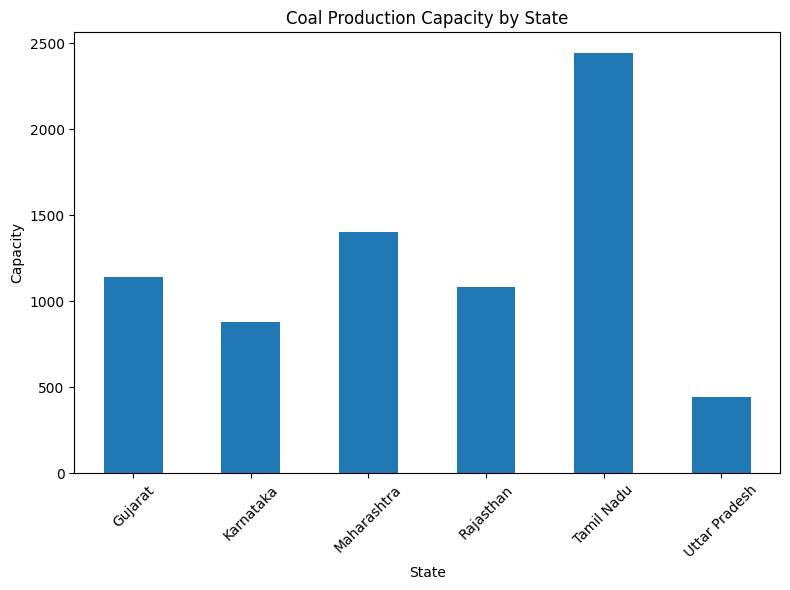

In [15]:
state_capacity = data_nuclear.groupby('State')['total capacity'].sum()
plt.figure(figsize=(8, 6))
state_capacity.plot(kind='bar')
plt.title('Coal Production Capacity by State')
plt.xlabel('State')
plt.ylabel('Capacity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

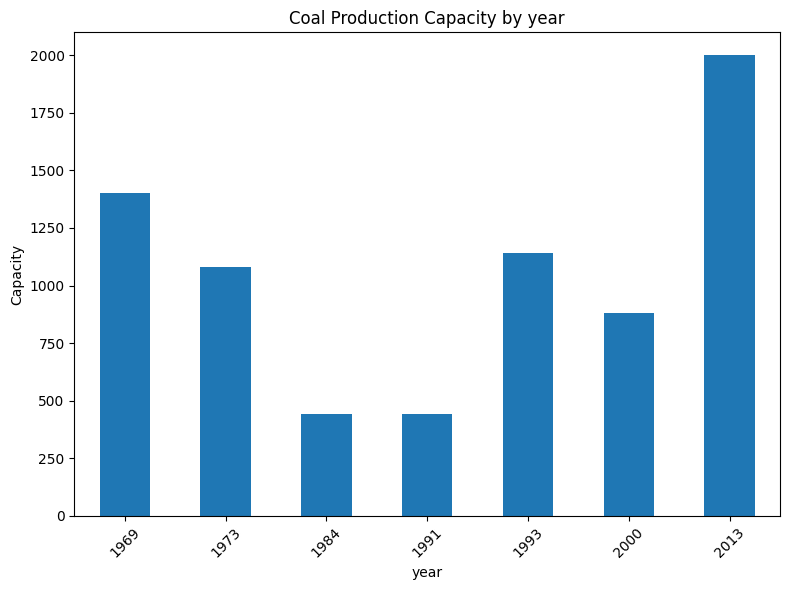

In [16]:
state_capacity = data_nuclear.groupby('Year')['total capacity'].sum()
plt.figure(figsize=(8, 6))
state_capacity.plot(kind='bar')
plt.title('Coal Production Capacity by year')
plt.xlabel('year')
plt.ylabel('Capacity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observ

Root Mean Squared Error: 738.98


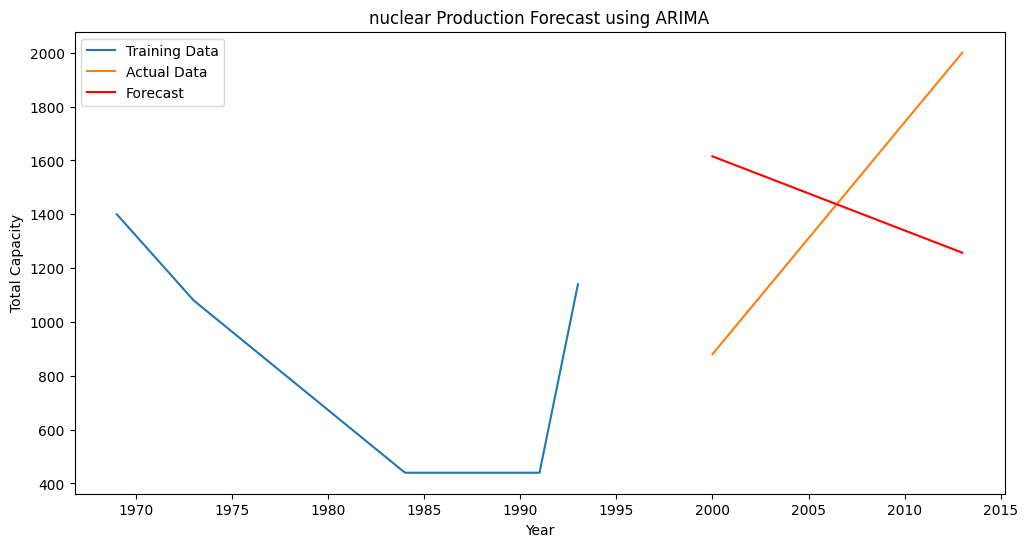

C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


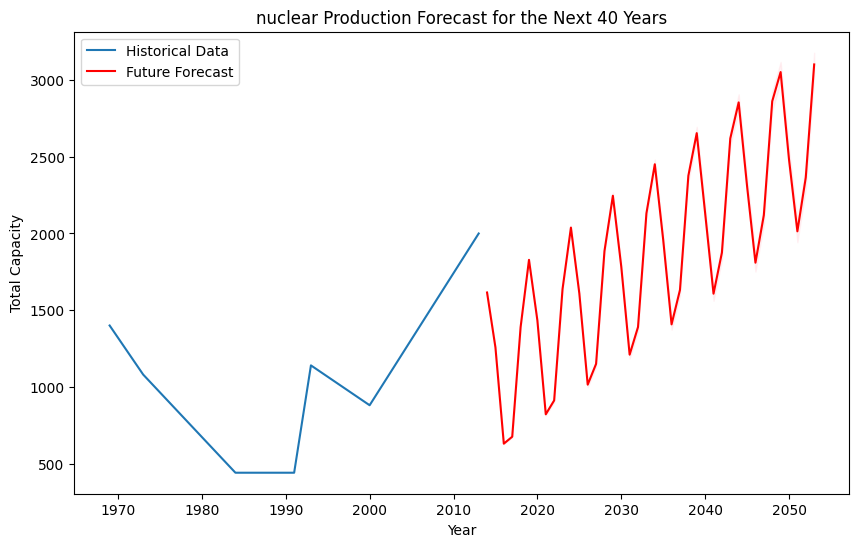

In [17]:
data_nuclear['Year'] = pd.to_datetime(data_nuclear['Year'], format='%Y')
data_nuclear.set_index('Year', inplace=True)

# Split data into training and testing sets
train_size = int(0.8 * len(data_nuclear))
train, test = data_nuclear[:train_size], data_nuclear[train_size:]

# Fit ARIMA model
model = ARIMA(train['total capacity'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
forecast_steps = len(test)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Calculate RMSE (you can use other metrics as well)
rmse = np.sqrt(mean_squared_error(test['total capacity'], forecast_mean))
print(f'Root Mean Squared Error: {rmse:.2f}')

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['total capacity'], label='Training Data')
plt.plot(test.index, test['total capacity'], label='Actual Data')
plt.plot(test.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.title('nuclear Production Forecast using ARIMA')
plt.xlabel('Year')
plt.ylabel('Total Capacity')
plt.show()

# Forecast for the next ten years
future_years = pd.date_range(start=data_nuclear.index[-1], periods=40, freq='Y')
future_forecast = model_fit.get_forecast(steps=40)
future_forecast_mean = future_forecast.predicted_mean
future_conf_int = future_forecast.conf_int()

# Visualize the future forecast
plt.figure(figsize=(10, 6))
plt.plot(data_nuclear.index, data_nuclear['total capacity'], label='Historical Data')
plt.plot(future_years, future_forecast_mean, label='Future Forecast', color='red')
plt.fill_between(future_years, future_conf_int.iloc[:, 0], future_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.title('nuclear Production Forecast for the Next 40 Years')
plt.xlabel('Year')
plt.ylabel('Total Capacity')
plt.show()


# HYDROELECTRIC

In [18]:
data_hydro = pd.read_excel('Hydroelectric.xlsx')

In [19]:
data_hydro

,Station,District,State,Region,Unit capacities,Capacity,Year,Latitude,Longitude
0,Mulshi Dam,Pune,Maharashtra,Western,"6 x 25, 1 x 150#",300.0,1927,19.450685,76.110676
1,Pykara PH[49],Nilgiris,Tamil Nadu,Southern,NaN,59.2,1932,11.013651,78.408491
2,Pykara Ultimate Stage PH[50],Nilgiris,Tamil Nadu,Southern,3 x 50,150.0,1932,11.013651,78.408491
3,Mettur Dam,Salem,Tamil Nadu,Southern,4 x 50,240.0,1934,11.013651,78.408491
4,Bhakra Dam,Bilaspur,Punjab,Northern,"2 x 108, 3 x 126, 5 x 157",1379.0,1945,30.843233,75.417660
...,...,...,...,...,...,...,...,...,...
80,Lower Subansiri Hydroelectric Power Project,Lower Subansiri,Arunachal Pradesh,North East,8 x 250,2000.0,2016,28.033781,94.660358
81,Sardar Sarovar Dam,Narmada,Gujarat,Western,"6 x 200#, 5 x 50",1450.0,2017,22.696078,71.575102
82,Kishanganga Hydroelectric Project,Baramulla,Jammu and Kashmir,Northern,3 x 110,330.0,2018,33.654266,74.843320
83,Kambang Project[55],Kameng,Arunachal Pradesh,North East,3 x 2,6.0,2020,28.033781,94.660358


In [20]:
data_hydro['total capacity'] = data_hydro['Capacity']

In [21]:
data_hydro

,Station,District,State,Region,Unit capacities,Capacity,Year,Latitude,Longitude,total capacity
0,Mulshi Dam,Pune,Maharashtra,Western,"6 x 25, 1 x 150#",300.0,1927,19.450685,76.110676,300.0
1,Pykara PH[49],Nilgiris,Tamil Nadu,Southern,NaN,59.2,1932,11.013651,78.408491,59.2
2,Pykara Ultimate Stage PH[50],Nilgiris,Tamil Nadu,Southern,3 x 50,150.0,1932,11.013651,78.408491,150.0
3,Mettur Dam,Salem,Tamil Nadu,Southern,4 x 50,240.0,1934,11.013651,78.408491,240.0
4,Bhakra Dam,Bilaspur,Punjab,Northern,"2 x 108, 3 x 126, 5 x 157",1379.0,1945,30.843233,75.417660,1379.0
...,...,...,...,...,...,...,...,...,...,...
80,Lower Subansiri Hydroelectric Power Project,Lower Subansiri,Arunachal Pradesh,North East,8 x 250,2000.0,2016,28.033781,94.660358,2000.0
81,Sardar Sarovar Dam,Narmada,Gujarat,Western,"6 x 200#, 5 x 50",1450.0,2017,22.696078,71.575102,1450.0
82,Kishanganga Hydroelectric Project,Baramulla,Jammu and Kashmir,Northern,3 x 110,330.0,2018,33.654266,74.843320,330.0
83,Kambang Project[55],Kameng,Arunachal Pradesh,North East,3 x 2,6.0,2020,28.033781,94.660358,6.0


In [22]:
data_hydro.head()

,Station,District,State,Region,Unit capacities,Capacity,Year,Latitude,Longitude,total capacity
0,Mulshi Dam,Pune,Maharashtra,Western,"6 x 25, 1 x 150#",300.0,1927,19.450685,76.110676,300.0
1,Pykara PH[49],Nilgiris,Tamil Nadu,Southern,NaN,59.2,1932,11.013651,78.408491,59.2
2,Pykara Ultimate Stage PH[50],Nilgiris,Tamil Nadu,Southern,3 x 50,150.0,1932,11.013651,78.408491,150.0
3,Mettur Dam,Salem,Tamil Nadu,Southern,4 x 50,240.0,1934,11.013651,78.408491,240.0
4,Bhakra Dam,Bilaspur,Punjab,Northern,"2 x 108, 3 x 126, 5 x 157",1379.0,1945,30.843233,75.417660,1379.0


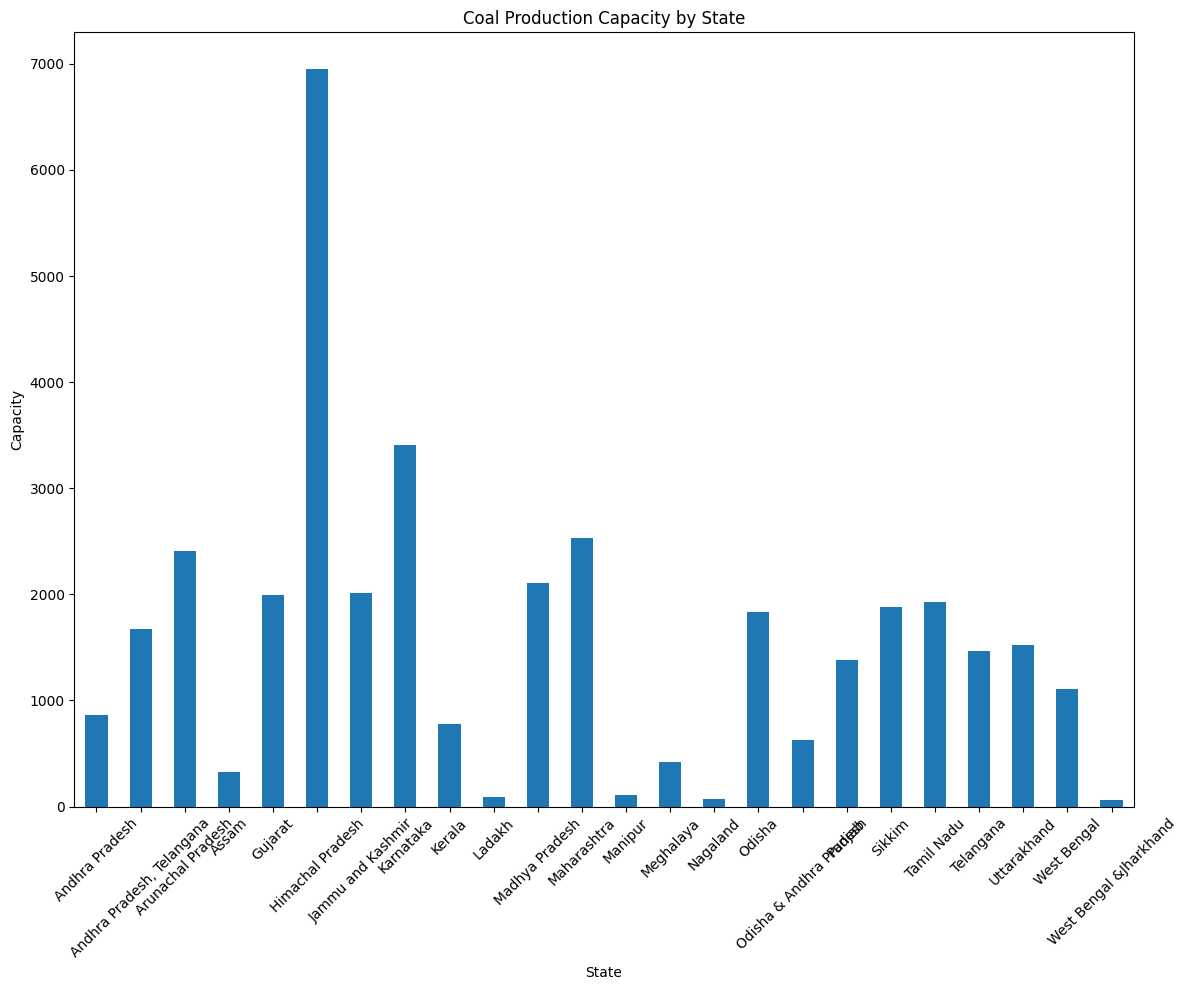

In [23]:
state_capacity = data_hydro.groupby('State')['total capacity'].sum()
plt.figure(figsize=(12, 10))
state_capacity.plot(kind='bar')
plt.title('Coal Production Capacity by State')
plt.xlabel('State')
plt.ylabel('Capacity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

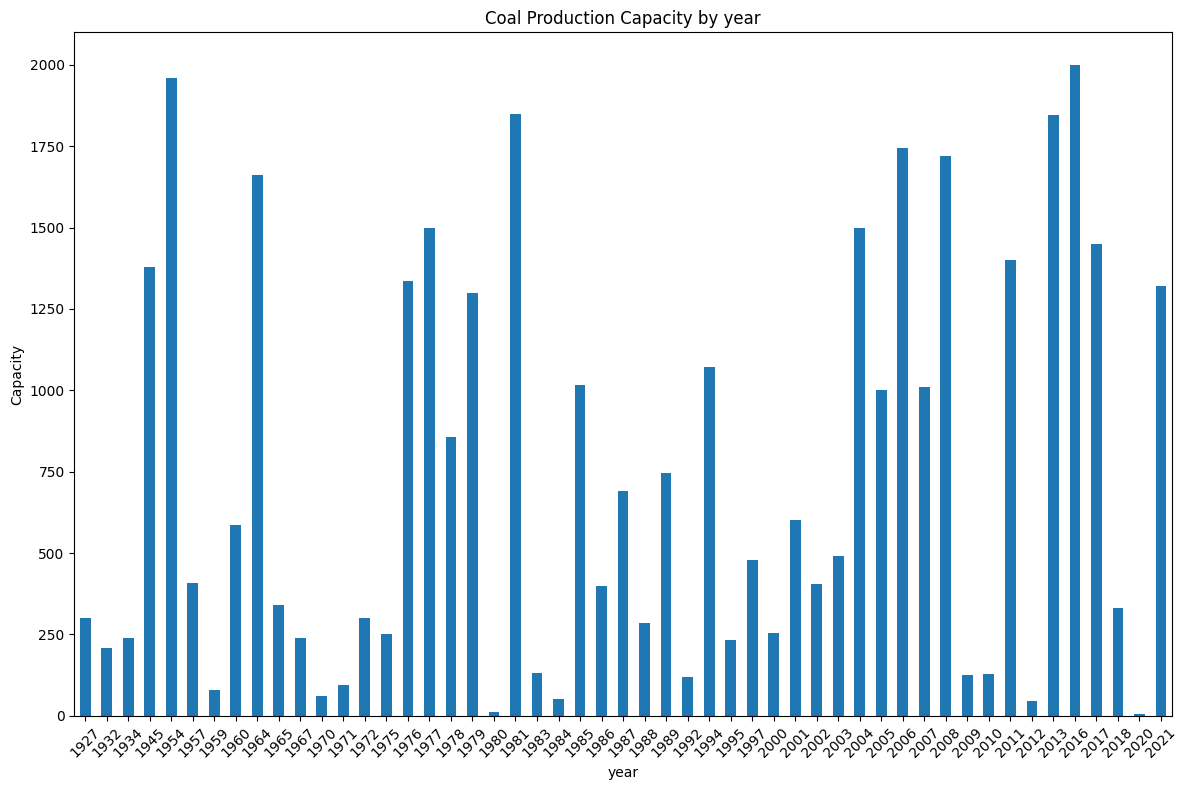

In [24]:
state_capacity = data_hydro.groupby('Year')['total capacity'].sum()
plt.figure(figsize=(12, 8))
state_capacity.plot(kind='bar')
plt.title('Coal Production Capacity by year')
plt.xlabel('year')
plt.ylabel('Capacity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

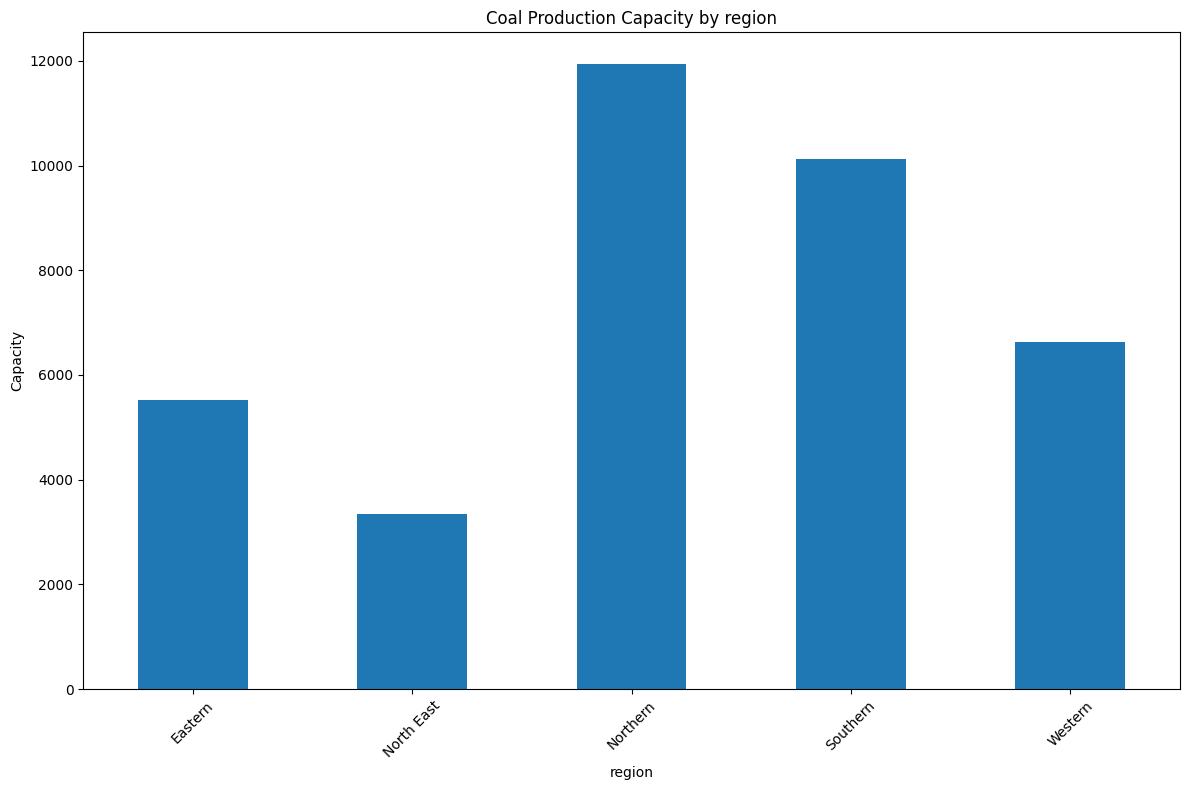

In [25]:
state_capacity = data_hydro.groupby('Region')['total capacity'].sum()
plt.figure(figsize=(12, 8))
state_capacity.plot(kind='bar')
plt.title('Coal Production Capacity by region')
plt.xlabel('region')
plt.ylabel('Capacity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported inde

Root Mean Squared Error: 592.81


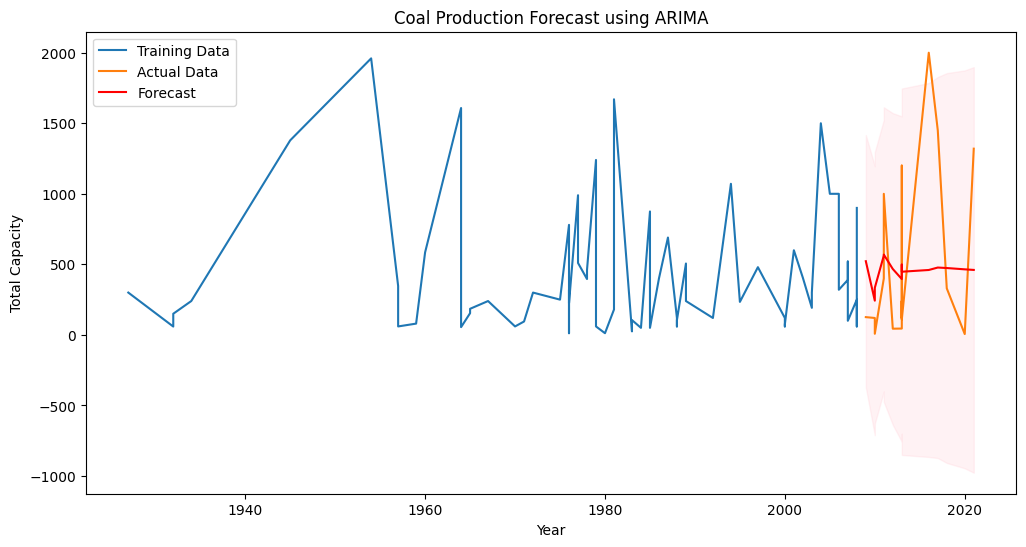

C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\jb pavi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


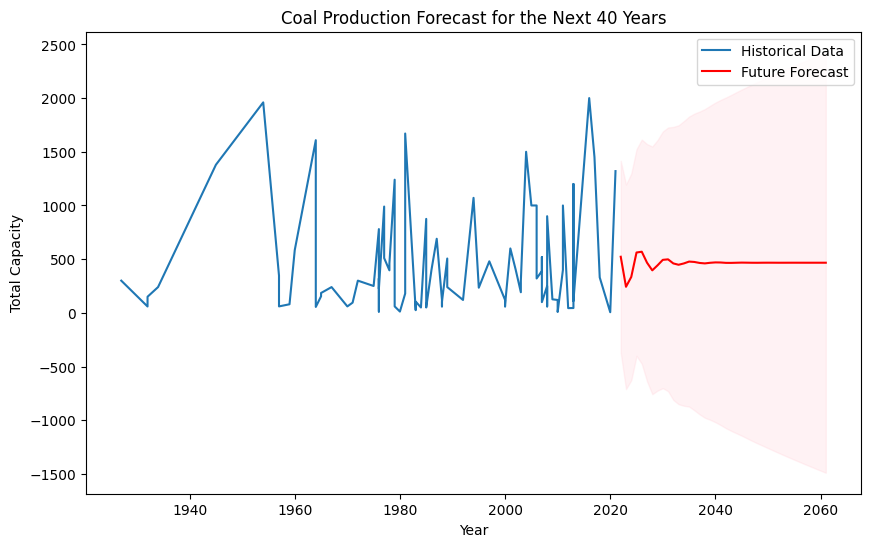

In [26]:
data_hydro['Year'] = pd.to_datetime(data_hydro['Year'], format='%Y')
data_hydro.set_index('Year', inplace=True)

# Split data into training and testing sets
train_size = int(0.8 * len(data_hydro))
train, test = data_hydro[:train_size], data_hydro[train_size:]

# Fit ARIMA model
model = ARIMA(train['total capacity'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
forecast_steps = len(test)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Calculate RMSE (you can use other metrics as well)
rmse = np.sqrt(mean_squared_error(test['total capacity'], forecast_mean))
print(f'Root Mean Squared Error: {rmse:.2f}')

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['total capacity'], label='Training Data')
plt.plot(test.index, test['total capacity'], label='Actual Data')
plt.plot(test.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.title('Coal Production Forecast using ARIMA')
plt.xlabel('Year')
plt.ylabel('Total Capacity')
plt.show()

# Forecast for the next ten years
future_years = pd.date_range(start=data_hydro.index[-1], periods=40, freq='Y')
future_forecast = model_fit.get_forecast(steps=40)
future_forecast_mean = future_forecast.predicted_mean
future_conf_int = future_forecast.conf_int()

# Visualize the future forecast
plt.figure(figsize=(10, 6))
plt.plot(data_hydro.index, data_hydro['total capacity'], label='Historical Data')
plt.plot(future_years, future_forecast_mean, label='Future Forecast', color='red')
plt.fill_between(future_years, future_conf_int.iloc[:, 0], future_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.title('Coal Production Forecast for the Next 40 Years')
plt.xlabel('Year')
plt.ylabel('Total Capacity')
plt.show()


### kizha irukura code is for combining the above 3 graphs, so enna panra naa ellathukume "future_forecast_mean" dhan iruku. coal thavara ellathukume maathanum like "future_forecast_mean_nuclear" and "future_forecast_mean_hydro" maathitu idha run panna varum ella graphs um single graph 

## error vantha sollu d punda

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming you have the data and preprocessing for each energy source already done

# Fit ARIMA models and generate forecasts for each energy source

# ... (Your code for coal, nuclear, and hydro forecasts) ...

# Create a combined DataFrame for the final predictions
combined_forecast = pd.DataFrame({
    'Coal': future_forecast_mean,
    'Nuclear': future_forecast_mean_nuclear,
    'Hydroelectric': future_forecast_mean_hydro
}, index=future_years)

# Plot the combined forecast graph
plt.figure(figsize=(12, 8))

plt.plot(data.index, data['total capacity'], label='Coal Historical Data')
plt.plot(data_nuclear.index, data_nuclear['total capacity'], label='Nuclear Historical Data')
plt.plot(data_hydro.index, data_hydro['total capacity'], label='Hydroelectric Historical Data')

plt.plot(combined_forecast.index, combined_forecast['Coal'], label='Coal Future Forecast', linestyle='dashed')
plt.plot(combined_forecast.index, combined_forecast['Nuclear'], label='Nuclear Future Forecast', linestyle='dashed')
plt.plot(combined_forecast.index, combined_forecast['Hydroelectric'], label='Hydroelectric Future Forecast', linestyle='dashed')

plt.legend()
plt.title('Energy Production Forecast for the Next 40 Years')
plt.xlabel('Year')
plt.ylabel('Total Capacity')
plt.show()


NameError: name 'future_forecast_mean_nuclear' is not defined